# Example of optimizing a convex function

# Goal is to test the objective values found by Mango
- Search space size: Uniform
- Number of iterations to try: 40
- domain size: 5000 
- Initial Random: 5

# Benchmarking test with different iterations for serial executions

In [4]:
from scipy.stats import uniform
from mango.domain.distribution import loguniform
from mango.tuner import Tuner 

def get_param_dict():
    param_dict = {"gamma": uniform(0.1, 4),
              "C": loguniform(-7, 7)}
    return param_dict

from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()

# Take only the first two features.
X = iris.data[:,:2]
Y = iris.target

def objectiveSVM(args_list):
    global X,Y
    
    results = []
    for hyper_par in args_list:
        clf = svm.SVC(**hyper_par)
        result  = cross_val_score(clf, X, Y, scoring='accuracy').mean()
        results.append(result)
    return results


def get_conf():
    conf = dict()
    conf['batch_size'] = 1
    conf['initial_random'] = 5
    conf['num_iteration'] = 100
    conf['domain_size'] = 5000
    
    return conf

def get_optimal_x():
    param_dict = get_param_dict()
    conf = get_conf()
    tuner = Tuner(param_dict, objectiveSVM,conf)
    results = tuner.maximize()
    return results

In [5]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 20

In [6]:
for i in range(num_of_tries):
    results = get_optimal_x()
    Store_Results.append(results)
    #print(results)
    print(i,":",results['best_objective'])

0 : 0.8337418300653594
1 : 0.8337418300653594
2 : 0.8337418300653594
3 : 0.8337418300653594
4 : 0.8337418300653594
5 : 0.8337418300653594
6 : 0.8337418300653594
7 : 0.8337418300653594
8 : 0.8337418300653594
9 : 0.8337418300653594
10 : 0.8337418300653594
11 : 0.8337418300653594
12 : 0.8337418300653594
13 : 0.8337418300653594
14 : 0.8337418300653594
15 : 0.8337418300653594
16 : 0.8337418300653594
17 : 0.8337418300653594
18 : 0.8337418300653594
19 : 0.8337418300653594


# Extract from the results returned the true optimal values for each iteration

In [7]:
import numpy as np

total_experiments = 20

initial_random = 5

plotting_itr =[20,30,40,50,60,70,80,90,100]

plotting_list = []

for exp in range(total_experiments): #for all exp
    local_list = []
    for itr in plotting_itr: # for all points to plot
        # find the value of optimal parameters in itr+ initial_random
        max_value = np.array(Store_Results[exp]['objective_values'][:itr+initial_random]).max()
        local_list.append(max_value)
    plotting_list.append(local_list)

In [8]:
plotting_array = np.array(plotting_list)

In [9]:
Y = []

range_min = -100
range_max = 100
#count range between -1 and 1 and show it
for i in range(len(plotting_itr)):
    y_value = plotting_array[:,i].mean()
    Y.append(y_value)

In [10]:
# Printing Y Values

In [11]:
Y

[0.8285539215686274,
 0.8309640522875817,
 0.832700163398693,
 0.832700163398693,
 0.8327205882352942,
 0.8330678104575163,
 0.8334150326797387,
 0.8337418300653596,
 0.8337418300653596]

In [12]:
plotting_itr

[20, 30, 40, 50, 60, 70, 80, 90, 100]

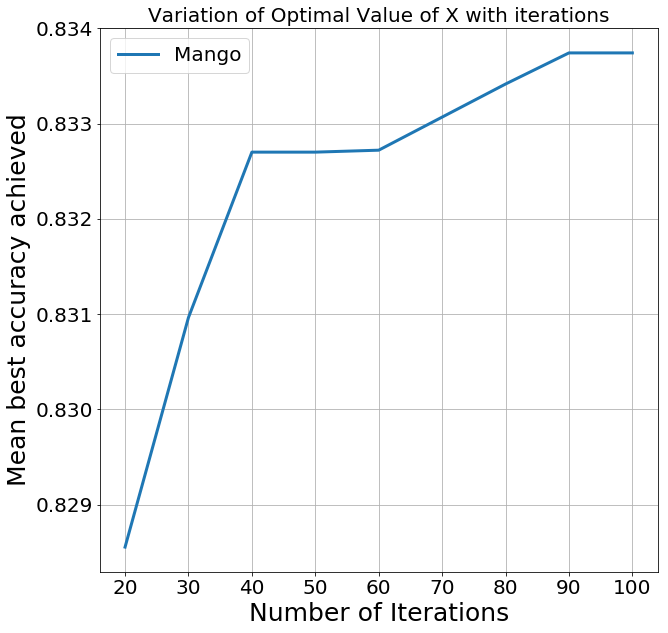

In [14]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y,label = 'Mango',linewidth=3.0) #x, y


plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean best accuracy achieved',fontsize=25)
plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()